# Day 2 Continuing with inmuebles_bogota.csv file

In [101]:
import pandas as pd
import numpy as np

Importing data

In [102]:
data=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\Inmersion-datos-aiura-Latam\Inmersion-datos-Aiura-LATAM\inmuebles_bogota.csv")

Writing a better name for columns just to not have future troubles 

In [103]:
data=data.rename(columns={"Área":"Area","Baños":"Banos"})

In [104]:
data.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


We can clearly see that "Valor" has an object type and we wanted with an "int" type

In [106]:
data.Valor.str.split() # we can apply string functions because is an object type. It returns a Series data with list
data.Valor.str.split(expand=True) #expand returns a new dataframe with the entrances of the list
# Check series.atributes for more info

,0,1
0,$,360.000.000
1,$,670.000.000
2,$,1.120.000.000
3,$,890.000.000
4,$,970.000.000
...,...,...
9515,$,290.000.000
9516,$,670.000.000
9517,$,900.000.000
9518,$,335.000.000


Save the column of the number (which still is a object type)

In [107]:
data["cost_millions"]=data.Valor.str.split(expand=True)[1]
data.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,cost_millions
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,970.000.000


We need to erase the "." in the numbers

In [108]:
data.cost_millions=data.cost_millions.str.replace(".","",regex=True) # regex is to verify is a regular expression is written
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tipo           9520 non-null   object
 1   Descripcion    9520 non-null   object
 2   Habitaciones   9520 non-null   int64 
 3   Banos          9520 non-null   int64 
 4   Area           9520 non-null   int64 
 5   Barrio         9520 non-null   object
 6   UPZ            9478 non-null   object
 7   Valor          9520 non-null   object
 8   cost_millions  9520 non-null   object
dtypes: int64(3), object(6)
memory usage: 669.5+ KB


We change the cost_millions column type from object to float value

In [109]:
data.cost_millions=data.cost_millions.astype("float")/1000000
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banos          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   cost_millions  9520 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 669.5+ KB


In [110]:
data.sample(10)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,cost_millions
2932,Apartamento,Apartamento en venta en Bosa,2,1,48,Bosa,Bosa Central,$ 130.000.000,130.00
4611,Apartamento,Apartamento en venta en Palermo,2,1,49,Palermo,Galerías,$ 330.000.000,330.00
33,Apartamento,Apartamento en venta en Fontibón,3,3,87,Fontibón,Fontibón,$ 520.000.000,520.00
3308,Apartamento,Apartamento en venta en Usaquén,3,3,60,Usaquén,Usaquén,$ 235.000.000,235.00
8909,Casa,Casa en venta en Quinta Camacho,5,5,480,Quinta Camacho,CHAPINERO: Chicó Lago + El Refugio,$ 2.500.000.000,2500.00
3468,Apartamento,Apartamento en venta en Chapinero,1,1,31,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 241.200.000,241.20
9348,Local,Local en venta en Marly,1,2,65,Marly,CHAPINERO: Pardo Rubio + Chapinero,$ 530.000.000,530.00
1485,Apartamento,Apartamento en venta en Suba,3,2,77,Suba,Suba,$ 360.000.000,360.00
5914,Apartamento,Apartamento en venta en Cedritos,1,2,51,Cedritos,Usaquén,$ 320.000.000,320.00
2049,Apartamento,Apartamento en venta en Barrios Unidos,1,2,51,Barrios Unidos,Los Andes,$ 419.000.000,419.00


### Cambiar el número de decimales que se muestran en el df

In [111]:
pd.set_option("display.precision",2)
pd.set_option("display.float_format",lambda x: "%.2f" %x)
data.describe()

,Habitaciones,Banos,Area,cost_millions
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


## Strange Data

In [112]:
data[data.Habitaciones == data.Habitaciones.max()]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,cost_millions
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,480.00


In [113]:
data.loc[data.Banos == data.Banos.min()]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,cost_millions
2910,Edificio,Edificio en venta en Santa Barbara,22,0,1080,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 9.200.000.000,9200.00
8193,Casa,Casa en venta en Puente Aranda,15,0,450,Puente Aranda,PUENTE ARANDA: Zona Industrial + Puente Aranda,$ 1.000.000.000,1000.00
9451,Casa,Casa en venta en Bosa,10,0,540,Bosa,Bosa Central,$ 800.000.000,800.00


In [114]:
data[data.Area == data.Area.min()]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,cost_millions
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,180.00


<Axes: ylabel='Frequency'>

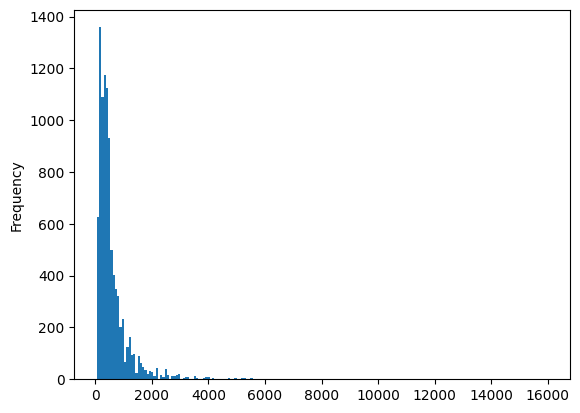

In [115]:
data.cost_millions.plot.hist(bins=200) #bins = number of classes of the histogram

## Data visualization with Seaborn and Matplotlib

Seaborn is matplotlib based. It creates better plots than Matplotlib.
Using both libraries we can create great plots and figures.

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

First we create a figure where we will make our graphic

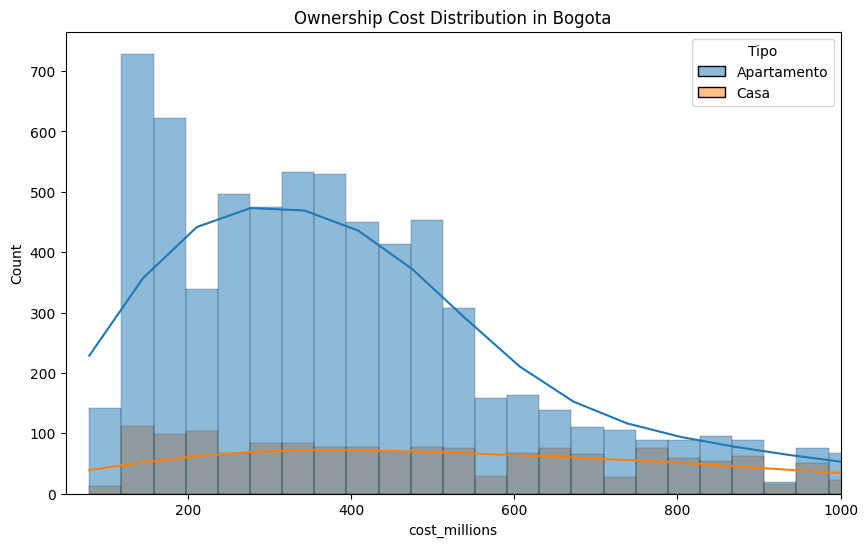

In [117]:
plt.figure(figsize=(10,6)) # create ploting space (width, height)
subset=data[(data.Tipo == "Casa") | (data.Tipo == "Apartamento")]
subset.head()
graph=sns.histplot(data=subset, x= "cost_millions", kde=True,hue="Tipo") # kde = kernel density estimate
#hue = divide x data into different categories that exist in an especific column 
graph.set_title("Ownership Cost Distribution in Bogota") # set title
plt.xlim((50,1000)) #set x range
#plt.ylim((0,5))
# plt.savefig("cost_distribution.png", format = "png") #if we want to save it in another folder, write folder's path
plt.show()

# Day 3

## **Get the cost/m2 by neighborhood** 

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banos          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   cost_millions  9520 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 669.5+ KB


In [119]:
data["c_a_m"] = data.cost_millions/data.Area #This way gives the cost/m2 by each property
data.groupby("Barrio").mean(numeric_only=True).head()


,Habitaciones,Banos,Area,cost_millions,c_a_m
Barrio,,,,,
Alameda,3.00,2.00,97.00,580.00,5.98
Alhambra,3.00,2.94,190.41,752.35,4.33
Andes Norte,3.00,2.86,124.86,709.57,6.05
Antonio Nariño,4.31,2.50,163.06,459.22,3.53
Barrancas,2.87,2.13,70.20,314.13,4.42


In [120]:
datos_barrio=data.groupby("Barrio").sum(numeric_only=True) #mean of all columns of numerical value
datos_barrio.c_a_m=datos_barrio["cost_millions"]/datos_barrio["Area"] # gives the cost/m2 by neighborhood
datos_barrio.head()

,Habitaciones,Banos,Area,cost_millions,c_a_m
Barrio,,,,,
Alameda,3,2,97,580.00,5.98
Alhambra,51,50,3237,12790.00,3.95
Andes Norte,21,20,874,4967.00,5.68
Antonio Nariño,207,120,7827,22042.65,2.82
Barrancas,43,32,1053,4712.00,4.47


 We will map the values of cost/m2 by neighborhood into our df called data

In [121]:
cost_nbhd=dict(datos_barrio.c_a_m)
cost_nbhd

{'Alameda': 5.979381443298969,
 'Alhambra': 3.95118937287612,
 'Andes Norte': 5.683066361556064,
 'Antonio Nariño': 2.816232272901495,
 'Barrancas': 4.4748338081671415,
 'Barrios Unidos': 2.9599171141243064,
 'Bella Suiza': 6.2905507012394,
 'Bellavista Occidental': 2.522711390635919,
 'Bochica': 3.4078212290502794,
 'Bogotá D.C': 5.212760277629472,
 'Bosa': 2.6778451358697213,
 'Bosa Piamonte': 1.175,
 'Bosa Porvenir': 3.1666666666666665,
 'Bosque De Pinos': 6.046475195822455,
 'Bosque Popular': 3.864097363083164,
 'Boyaca ': 2.637421499815294,
 'Buenos Aires': 2.6,
 'Candelaria La Nueva': 4.0625,
 'Cantagallo': 5.71920581655481,
 'Capellania': 4.316791690709752,
 'Casablanca': 6.245421245421245,
 'Castilla': 3.4035893155258763,
 'Cedritos': 5.027419586695463,
 'Cerros De Suba': 6.202830188679245,
 'Chapinero': 4.58018576602501,
 'Chapinero Alto': 6.4239336492891,
 'Chapinero Central': 6.360286919831224,
 'Chico Navarra': 5.1563019620884605,
 'Chico Norte': 8.353851040924855,
 'Chico 

Change the values to the neighborhood of each one, and then, with the key of my dictionary created, The cost/m2 by neighborhood will be set into each column of my original df

In [122]:
data.c_a_m=data.Barrio 
data.c_a_m=data.c_a_m.map(cost_nbhd)
data.head(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,cost_millions,c_a_m
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,360.00,4.57
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,670.00,3.40
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,1120.00,8.10


In [123]:
top_barrios=data.Barrio.value_counts()[:10].index# It works as a list
top_barrios

Index(['Usaquén', 'Zona Noroccidental', 'Bosa', 'Kennedy', 'Cedritos',
       'Barrios Unidos', 'Engativa', 'Suba', 'Santa Barbara', 'Chapinero'],
      dtype='object')

In [124]:
datos_barrio.reset_index(drop=False,inplace=True)
datos_barrio

,Barrio,Habitaciones,Banos,Area,cost_millions,c_a_m
0,Alameda,3,2,97,580.00,5.98
1,Alhambra,51,50,3237,12790.00,3.95
2,Andes Norte,21,20,874,4967.00,5.68
3,Antonio Nariño,207,120,7827,22042.65,2.82
4,Barrancas,43,32,1053,4712.00,4.47
...,...,...,...,...,...,...
144,Villa Maria,61,48,2693,5237.00,1.94
145,Villas De Granada,76,51,1905,6210.62,3.26
146,Villemar,53,37,1384,5469.00,3.95
147,Zona Franca,2,1,54,160.00,2.96


In [127]:
datos_barrio.query("Barrio in @top_barrios")


,Barrio,Habitaciones,Banos,Area,cost_millions,c_a_m
5,Barrios Unidos,1525,1196,87799,259877.76,2.96
10,Bosa,1743,789,34879,93400.56,2.68
22,Cedritos,1458,1348,53711,270027.73,5.03
24,Chapinero,892,913,81248,372130.93,4.58
50,Engativa,1676,1077,59808,172711.73,2.89
63,Kennedy,2151,1233,61475,207963.65,3.38
125,Santa Barbara,1073,1162,54693,320097.80,5.85
132,Suba,1497,1202,61615,266406.04,4.32
138,Usaquén,3109,3044,148121,837710.36,5.66
148,Zona Noroccidental,2778,2204,119084,544453.06,4.57


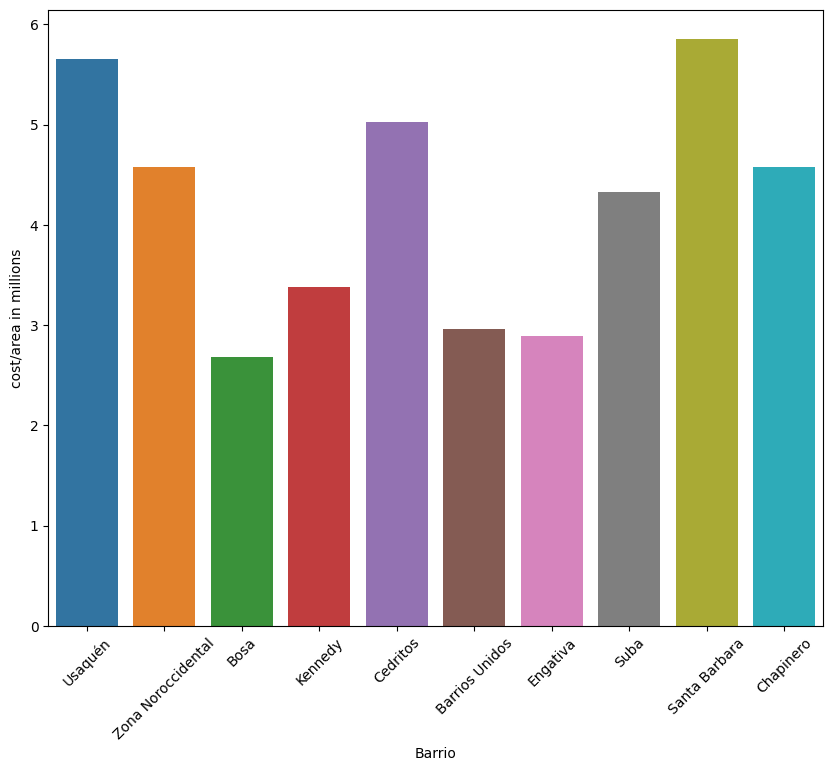

In [134]:
plt.figure(figsize=((10,8)))
ax=sns.barplot(data=datos_barrio.query("Barrio in @top_barrios"), x= "Barrio", y="c_a_m", order=top_barrios)
ax.set_ylabel("cost/area in millions")
ax.tick_params(axis="x", rotation=45)
plt.show()

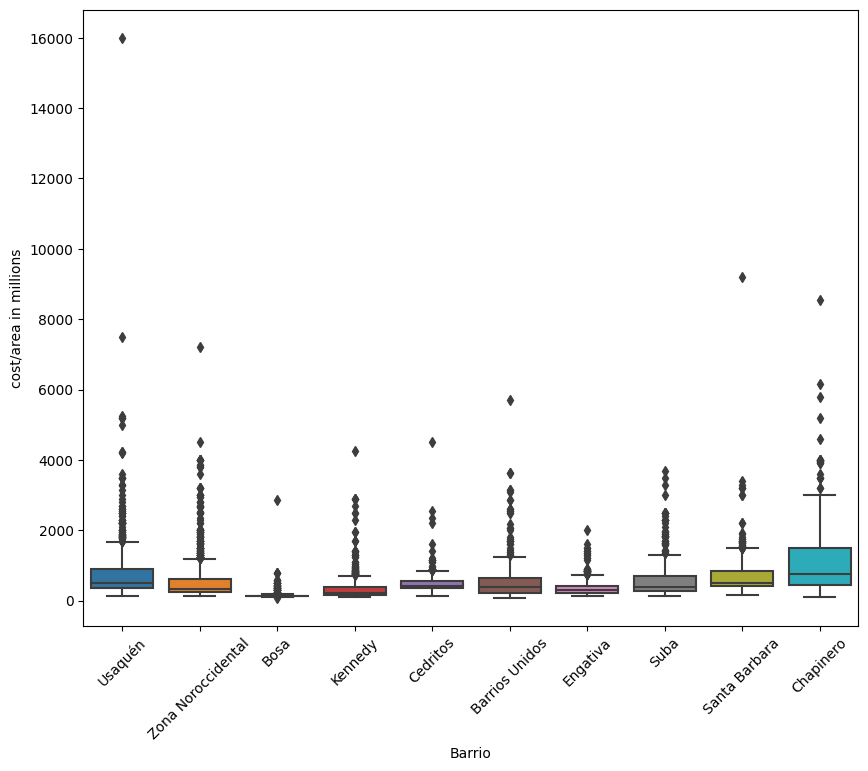

In [139]:
plt.figure(figsize=((10,8)))
ax=sns.boxplot(data=data.query("Barrio in @top_barrios"), x= "Barrio", y="cost_millions", order=top_barrios)
ax.set_ylabel("cost/area in millions")
ax.tick_params(axis="x", rotation=45)
plt.show()

## BRING NEW DATASETS AND ADD THEM TO OUR DATA

In [142]:
datos_raw=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\Inmersion-datos-aiura-Latam\Inmersion-datos-Aiura-LATAM\Day 3\Identificación (Capítulo A).csv", encoding="latin-1",sep=";")
datos_raw.head() #enconding is different to utf-8

,DIRECTORIO,DPTO,MPIO,CLASE,COD_LOCALIDAD,NOMBRE_LOCALIDAD,COD_UPZ_GRUPO,NOMBRE_UPZ_GRUPO,ESTRATO2021,NOMBRE_ESTRATO,FEX_C
0,3004346.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"13,2266692027239"
1,3004347.00,11,11001,1,14.00,Los Mártires,37.00,Santa Isabel,11001162,Santa Isabel,"17,8555889419101"
2,3004348.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"10,0286103658331"
3,3004349.00,11,11001,1,1.00,Usaquén,803.00,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"28,6502122142802"
4,3004350.00,11,11001,1,1.00,Usaquén,803.00,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"24,4684068319009"


In [144]:
datos_raw.shape

(106467, 11)

In [149]:
# Focusing on Bogotá
datos_raw=datos_raw.loc[datos_raw.MPIO == 11001]
datos_raw.shape

(86504, 11)

In [150]:
datos_b=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\Inmersion-datos-aiura-Latam\Inmersion-datos-Aiura-LATAM\Day 3\Datos de la vivenda y su entorno (Capítulo B).csv", encoding="latin-1",sep=";")
datos_c=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\Inmersion-datos-aiura-Latam\Inmersion-datos-Aiura-LATAM\Day 3\Condiciones habitacionales del hogar (Capítulo C).csv", encoding="latin-1",sep=";")
datos_e=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\Inmersion-datos-aiura-Latam\Inmersion-datos-Aiura-LATAM\Day 3\Composición del hogar y demografía (Capítulo E).csv", encoding="latin-1",sep=";")
datos_h=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\Inmersion-datos-aiura-Latam\Inmersion-datos-Aiura-LATAM\Day 3\Educación (Capitulo H).csv", encoding="latin-1",sep=";")
datos_l=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\Inmersion-datos-aiura-Latam\Inmersion-datos-Aiura-LATAM\Day 3\Percepción sobre las condiciones de vida y el desempeño institucional (Capítulo L).csv", encoding="latin-1",sep=";")
datos_k=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\Inmersion-datos-aiura-Latam\Inmersion-datos-Aiura-LATAM\Day 3\Fuerza de trabajo (Capítulo K).csv", encoding="latin-1",sep=";")


C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_11704\3849396465.py:2: DtypeWarning: Columns (4,25,30,47) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_c=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\Inmersion-datos-aiura-Latam\Inmersion-datos-Aiura-LATAM\Day 3\Condiciones habitacionales del hogar (Capítulo C).csv", encoding="latin-1",sep=";")
C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_11704\3849396465.py:3: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_e=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\Inmersion-datos-aiura-Latam\Inmersion-datos-Aiura-LATAM\Day 3\Composición del hogar y demografía (Capítulo E).csv", encoding="latin-1",sep=";")
C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_11704\3849396465.py:4: DtypeWarning: Columns (26,81) have mixed types. Specify dtype option on import or set low_memory=False.
  da

In [152]:
datos_dane=pd.merge(datos_raw,datos_b,on="DIRECTORIO",how="left")
datos_dane.shape

(86504, 73)

In [153]:
datos_dane=pd.merge(datos_dane,datos_c,on="DIRECTORIO",how="left")
datos_dane.shape

(87061, 214)

In [154]:
datos_dane=pd.merge(datos_dane,datos_e,on="DIRECTORIO",how="left")
datos_dane.shape

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_11704\1337289417.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'FEX_C_x'} in the result is deprecated and will raise a MergeError in a future version.
  datos_dane=pd.merge(datos_dane,datos_e,on="DIRECTORIO",how="left")


(238559, 281)

In [155]:
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238559 entries, 0 to 238558
Columns: 281 entries, DIRECTORIO to FEX_C_y
dtypes: float64(140), int64(126), object(15)
memory usage: 513.3+ MB
